In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)

In [8]:
# Load the raw data
print("Loading housing market data...")
df_raw = pd.read_csv('Documents/raw_data.csv')

Loading housing market data...


In [9]:
# Display basic dataset information
print(f"\nDataset dimensions: {df_raw.shape[0]} rows, {df_raw.shape[1]} columns")
print("\nColumn names:")
print(df_raw.columns.tolist())


Dataset dimensions: 5555 rows, 16 columns

Column names:
['Address', 'City', 'Price', 'Lot size (m2)', 'Living space size (m2)', 'Build year', 'Build type', 'House type', 'Roof', 'Rooms', 'Toilet', 'Floors', 'Energy label', 'Position', 'Garden', 'Estimated neighbourhood price per m2']


In [13]:
# Display first few rows
print("\nFirst 5 rows of the dataset:")
df_raw.head()

# Check data types of each column
print("\nData types:")
print(df_raw.dtypes)


First 5 rows of the dataset:

Data types:
Address                                 object
City                                    object
Price                                   object
Lot size (m2)                           object
Living space size (m2)                  object
Build year                              object
Build type                              object
House type                              object
Roof                                    object
Rooms                                   object
Toilet                                  object
Floors                                  object
Energy label                            object
Position                                object
Garden                                  object
Estimated neighbourhood price per m2    object
dtype: object


In [12]:
df_raw.head()

,Address,City,Price,Lot size (m2),Living space size (m2),Build year,Build type,House type,Roof,Rooms,Toilet,Floors,Energy label,Position,Garden,Estimated neighbourhood price per m2
0,Bovenweg 223,Sint Pancras,€ 525.000,251 m²,135 m²,1972,Bestaande bouw,"Eengezinswoning, 2-onder-1-kapwoning",Zadeldak bedekt met pannen,5 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,D,NaN,"Achtertuin, voortuin en zijtuin",6.035
1,Julianastraat 19,Waddinxveen,€ 425.000,181 m²,109 m²,1935,Bestaande bouw,"Herenhuis, geschakelde 2-onder-1-kapwoning",Schilddak bedekt met bitumineuze dakbedekking ...,4 kamers (3 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,E,Aan rustige weg en in woonwijk,Achtertuin en voortuin,1.435
2,Kuipersgilde 3,Houten,€ 575.000,198 m²,138 m²,1986,Bestaande bouw,"Eengezinswoning, 2-onder-1-kapwoning",Zadeldak bedekt met pannen,5 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,B,Aan rustige weg en in woonwijk,Achtertuin,1.855
3,De Kamp 1 A,Pannerden,€ 259.500,231 m²,92 m²,1989,Bestaande bouw,"Eengezinswoning, 2-onder-1-kapwoning",Zadeldak bedekt met pannen,5 kamers (3 slaapkamers),1 badkamer en 2 aparte toiletten,3 woonlagen,B,Aan rustige weg en in woonwijk,"Achtertuin, voortuin en zijtuin",2.190
4,Wildrijklaan 8,Sassenheim,€ 1.050.000,423 m²,210 m²,2000,Bestaande bouw,"Eengezinswoning, 2-onder-1-kapwoning",Schilddak bedekt met pannen,6 kamers (5 slaapkamers),2 badkamers en 2 aparte toiletten,4 woonlagen en een kelder,A,"Aan rustige weg, aan water, beschutte ligging,...","Achtertuin, voortuin en zijtuin",1.340


In [14]:
# Check for missing values
missing_values = df_raw.isnull().sum()
missing_percentage = (missing_values / len(df_raw)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print("\nMissing values by column:")
print(missing_data[missing_data['Missing Values'] > 0])


Missing values by column:
                                      Missing Values  Percentage
Build year                                        84    1.512151
Position                                         304    5.472547
Garden                                            58    1.044104
Estimated neighbourhood price per m2             169    3.042304


In [15]:
# Basic statistical summary for numeric columns
print("\nBasic statistics for numeric columns:")
print(df_raw.describe())

# Explore the distribution of cities
print("\nTop 10 cities by property count:")
city_counts = df_raw['City'].value_counts().head(10)
print(city_counts)


Basic statistics for numeric columns:
               Address       City      Price Lot size (m2) Living space size (m2) Build year      Build type                     House type                        Roof                     Rooms                        Toilet       Floors Energy label                        Position                  Garden Estimated neighbourhood price per m2
count             5555       5555       5555          5555                   5555       5471            5555                           5555                        5555                      5555                          5555         5555         5555                            5251                    5497                                 5386
unique            5472       1075        545          1226                    344        317               2                            107                          88                        77                            22           31           12                          

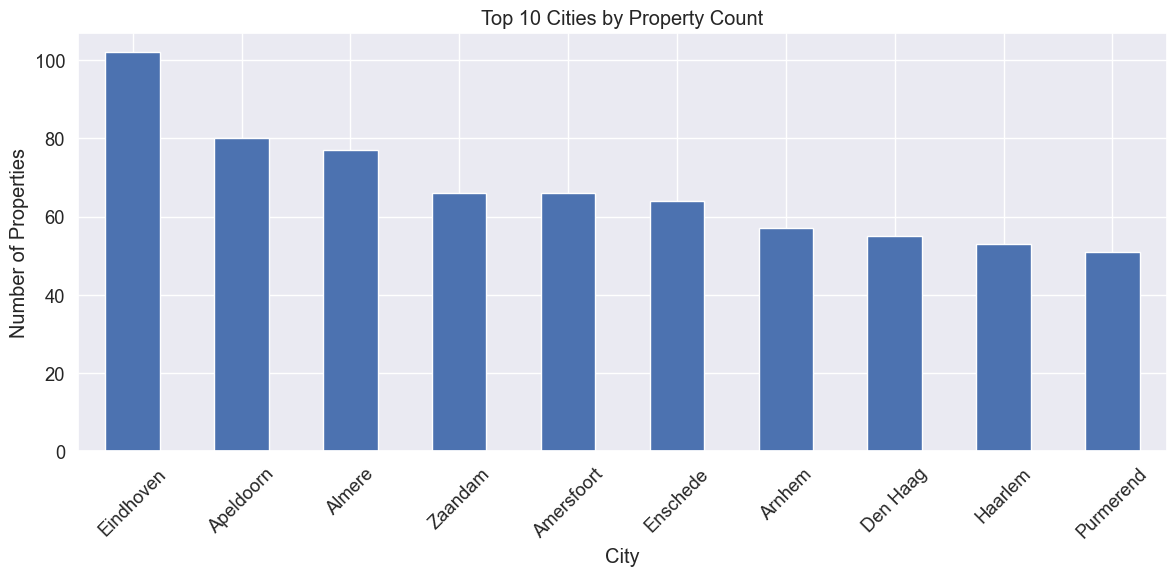

In [16]:
# Visualize city distribution
plt.figure(figsize=(12, 6))
city_counts.plot(kind='bar')
plt.title('Top 10 Cities by Property Count')
plt.xlabel('City')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# Explore build year distribution
print("\nBuild year statistics:")
build_year_stats = df_raw['Build year'].describe()
print(build_year_stats)


Build year statistics:
count     5471
unique     317
top       1972
freq       104
Name: Build year, dtype: object


TypeError: Cannot convert ['1972' '1935' '1986' ... '1921' '1996' '1898'] to numeric

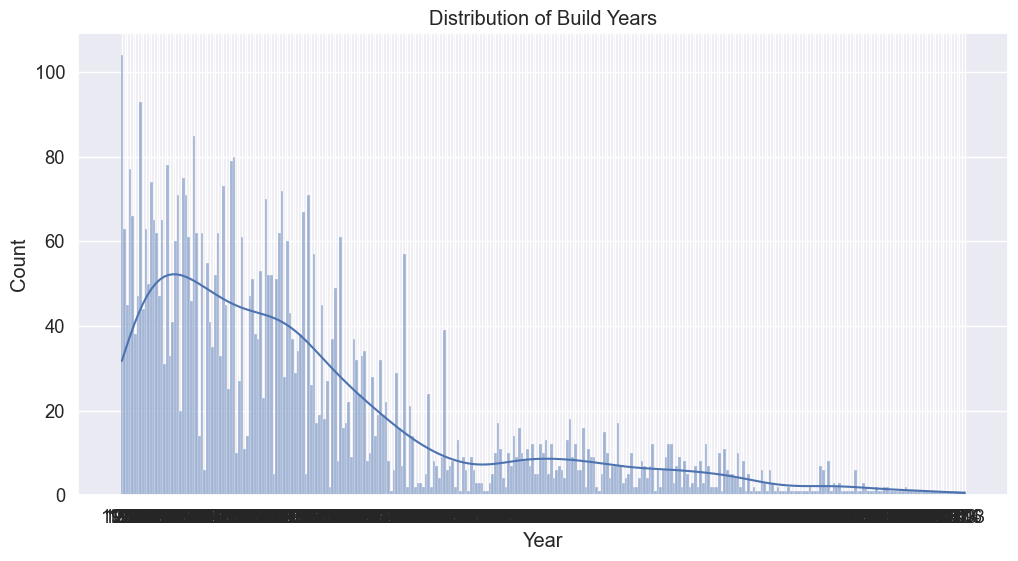

In [18]:
# Visualize build year distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_raw['Build year'].dropna(), bins=30, kde=True)
plt.title('Distribution of Build Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.axvline(df_raw['Build year'].median(), color='red', linestyle='--', label=f'Median: {df_raw["Build year"].median()}')
plt.legend()
plt.show()

In [21]:
# Explore energy label distribution
print("\nEnergy label distribution:")
energy_label_counts = df_raw['Energy label'].value_counts()
print(energy_label_counts)


Energy label distribution:
Energy label
C                 1545
A                 1254
B                  926
D                  642
E                  416
F                  300
G                  284
A+                  87
Niet verplicht      58
A++                 22
A+++                18
A++++                3
Name: count, dtype: int64


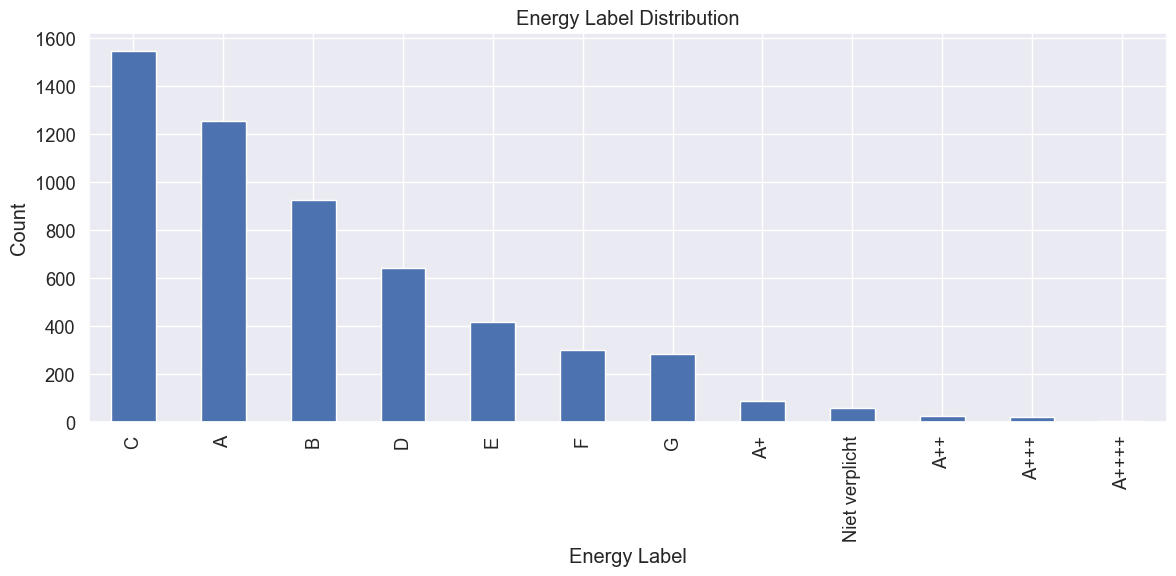

In [22]:
# Visualize energy label distribution
plt.figure(figsize=(12, 6))
energy_label_counts.plot(kind='bar')
plt.title('Energy Label Distribution')
plt.xlabel('Energy Label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [23]:
# Look at price column format
print("\nSample of Price values:")
print(df_raw['Price'].head(10))

# Look at size column format
print("\nSample of size values:")
print(df_raw['Living space size (m2)'].head(10))
print(df_raw['Lot size (m2)'].head(10))

# Explore house types
print("\nMost common house types:")
house_type_counts = df_raw['House type'].value_counts().head(10)
print(house_type_counts)

# Explore number of rooms
print("\nSample of room descriptions:")
print(df_raw['Rooms'].head(10))

# Explore garden information
print("\nSample of garden information:")
print(df_raw['Garden'].head(10))


Sample of Price values:
0      € 525.000
1      € 425.000
2      € 575.000
3      € 259.500
4    € 1.050.000
5      € 445.000
6      € 425.000
7      € 825.000
8      € 249.500
9      € 550.000
Name: Price, dtype: object

Sample of size values:
0    135 m²
1    109 m²
2    138 m²
3     92 m²
4    210 m²
5    126 m²
6     87 m²
7    232 m²
8    124 m²
9    111 m²
Name: Living space size (m2), dtype: object
0    251 m²
1    181 m²
2    198 m²
3    231 m²
4    423 m²
5    127 m²
6    170 m²
7    413 m²
8    235 m²
9    137 m²
Name: Lot size (m2), dtype: object

Most common house types:
House type
Eengezinswoning, tussenwoning                       1572
Eengezinswoning, vrijstaande woning                  852
Eengezinswoning, 2-onder-1-kapwoning                 845
Eengezinswoning, hoekwoning                          594
Villa, vrijstaande woning                            328
Eengezinswoning, geschakelde woning                  153
Eengezinswoning, eindwoning                          133

In [29]:
# Summary of initial exploration
print("\n=== Initial Data Exploration Summary ===")
print(f"1. Dataset contains {df_raw.shape[0]} properties with {df_raw.shape[1]} features")
print(f"2. Missing values in several columns (max {missing_data['Percentage'].max():.2f}% missing)")
build_years = pd.to_numeric(df_raw['Build year'], errors='coerce')
print(f"3. Build years range from {build_years.min()} to {build_years.max()}")
print(f"4. Most common cities: {', '.join(city_counts.index[:3])}")
print(f"5. Most common energy labels: {', '.join(energy_label_counts.index[:3])}")
print("6. Text cleaning needed for price and size columns")
print("7. Feature extraction needed for rooms and other text fields")
print("===========================================")



=== Initial Data Exploration Summary ===
1. Dataset contains 5555 properties with 16 features
2. Missing values in several columns (max 5.47% missing)
3. Build years range from 1500.0 to 2022.0
4. Most common cities: Eindhoven, Apeldoorn, Almere
5. Most common energy labels: C, A, B
6. Text cleaning needed for price and size columns
7. Feature extraction needed for rooms and other text fields
